<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Projects/Toxic_comment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comment Classification Challenge

Competition Link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview
### Identify and classify toxic online comments

Will dig deep and make this notebook annoted tomorrow! 

In [52]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
!nvidia-smi 

Mon Jun  7 21:01:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [54]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [55]:
# Unzipping toxic comments data
# !unzip /content/drive/MyDrive/data/jigsaw-toxic-comment-classification-challenge.zip -d drive/MyDrive/data/toxic_comments/

In [56]:
#!unzip /content/drive/MyDrive/data/toxic_comments/train.csv.zip -d drive/MyDrive/data/toxic_comments/
#!unzip /content/drive/MyDrive/data/toxic_comments/test.csv.zip -d drive/MyDrive/data/toxic_comments/
#!unzip /content/drive/MyDrive/data/toxic_comments/test_labels.csv.zip -d drive/MyDrive/data/toxic_comments/

In [57]:
data = pd.read_csv('drive/MyDrive/data/toxic_comments/train.csv')
test_data = pd.read_csv('drive/MyDrive/data/toxic_comments/test.csv')

data.shape , test_data.shape

((159571, 8), (153164, 2))

In [58]:
# Getting the labels csv for test data 
test_labels = pd.read_csv('drive/MyDrive/data/toxic_comments/test_labels.csv')
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


## Become one with the data 

In here we will try to get know our data better, if possible perform some EDA and derive insights from this data. 

**Things to do:**
- Get to know different labels and visualize comments from that. 
- Make some plots comparing the number of lables vs the number of comments exists for each group. 
- 

In [59]:
# How many comments are in train_data 
print(f" There are {len(data['comment_text'])} comments text in the train data")

 There are 159571 comments text in the train data


In [60]:
# Is there any missing values? Nope
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [61]:
# Let's drop the ID Column since we don't want that 
data = data.drop('id' , axis = 1)
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [62]:
# Are the lables are balanced? 
for col in data.columns[1:]:
  print(col)
  print(data[col].value_counts())
  print('-----------')

toxic
0    144277
1     15294
Name: toxic, dtype: int64
-----------
severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64
-----------
obscene
0    151122
1      8449
Name: obscene, dtype: int64
-----------
threat
0    159093
1       478
Name: threat, dtype: int64
-----------
insult
0    151694
1      7877
Name: insult, dtype: int64
-----------
identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64
-----------


Alright that's expected there are less toxicated comments than the goodies. But not really sure whether this will create an class imbalance on our data. 

And it doesn't look that good in text, let's visualize them. 

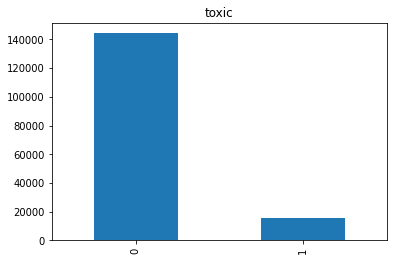

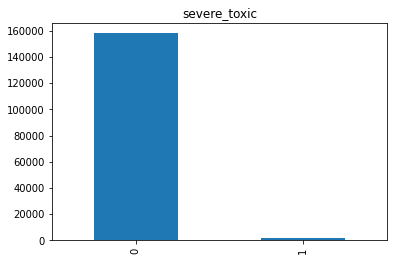

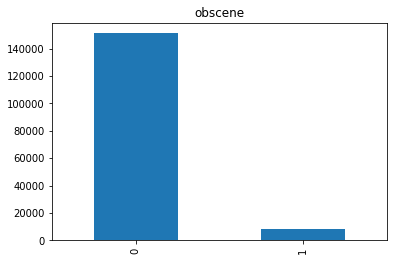

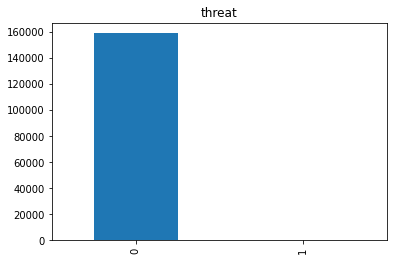

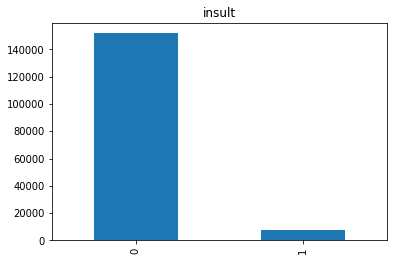

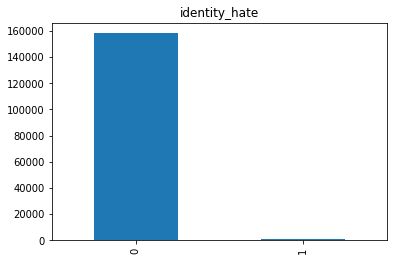

In [63]:
# Visualizing the value counts of each labels 
for col in data.columns[1:]:
  plt.title(col)
  data[col].value_counts().plot(kind = 'bar')
  plt.show()
  